In [58]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import datetime
import seaborn as sb
import datetime as dt
from collections import Counter

# called to counteract dark-mode Jupyter from swallowing axes &c.
plt.style.use('seaborn-whitegrid')

In [2]:
# Import the datasets
sales_db = pd.read_csv('data/sales_db.csv', sep='\t', dtype='unicode')

In [3]:
sales_db.head(12)

,ASIN,StockCode,title,product_type,rating,review_count,InvoiceNo,Quantity,price,total_sale,invoice_date,Country,CustomerID
0,B07GWKDLGT,21703,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,4.6,1399,78536597,4,496.95,1987.8,2018-12-01 17:00:00,Germany,18011
1,B01MTLH408,40001,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,4.6,289,78536597,4,39.99,159.96,2018-12-01 17:00:00,Germany,18011
2,B0064FS7HI,85034A,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,4.4,333,78536597,1,12.99,12.99,2018-12-01 17:00:00,Germany,18011
3,B013JHU5YG,72798C,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,4.3,86,78536597,1,199.99,199.99,2018-12-01 17:00:00,Germany,18011
4,B06XWN9Q99,20726,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,4.7,15717,78536597,1,7.49,7.49,2018-12-01 17:00:00,Germany,18011
5,B07F9QN5Q9,35271S,Camera Shoulder Double Strap Harness Quick Rel...,dslr camera,4.3,83,78536597,14,23.99,335.86,2018-12-01 17:00:00,Germany,18011
6,B006W1J3OK,20755,OP/TECH USA 3401002 Compact Sling for Cameras ...,dslr camera,4.2,253,78536597,6,11.95,71.7,2018-12-01 17:00:00,Germany,18011
7,B00EO4A7L0,22694,Rode SmartLav+ Omnidirectional Lavalier Microp...,dslr camera,4.1,2281,78536595,5,79.0,395.0,2018-12-01 17:00:00,Germany,13576
8,B0000BZL0G,21733,B + W 37mm UV Protection Filter (010) for Came...,dslr camera,4.5,6615,78536594,6,21.9,131.4,2018-12-01 17:00:00,Germany,15235
9,B004JMZPJQ,22366,Case Logic DCB-308 SLR Camera Sling (Black),dslr camera,4.3,925,78536593,2,49.99,99.98,2018-12-01 17:00:00,Germany,16835


In [4]:
sales_db.dtypes

ASIN            object
StockCode       object
title           object
product_type    object
rating          object
review_count    object
InvoiceNo       object
Quantity        object
price           object
total_sale      object
invoice_date    object
Country         object
CustomerID      object
dtype: object

In [5]:
sales_db = sales_db.astype({
    'product_type':'category',\
    'rating':'float',\
    'review_count':'int',\
    'Quantity':'int',\
    'price':'float',\
    'total_sale':'float',\
    'invoice_date':'datetime64',\
    'Country':'category'
})

<hr>

### CAB tasks
* What is the customer buying pattern? Per day of the week, weekly, monthly, quarterly, yearly, etc.
* Are there any specific days when the sales have been unusually high/low and what could be the possible reasons?
* Which countries and which customers made the highest number of orders? Are they the same with the highest spending?
* Can you try to make a map showing the 5 countries generating the max sales revenue, excluding Germany?
* Can we see the quarterly revenue behaviour?
* Can you create a plot showing the growth rate of new customers over the months?
* What do you think about the customers? Are they individuals or wholesalers? Why would you say so?
* Are there any issues with the dataset?

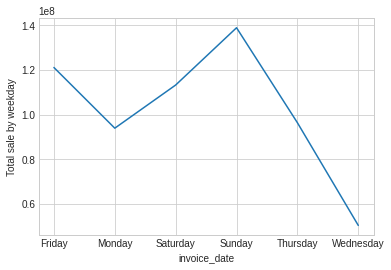

In [6]:
# Customer buying patterns -- day of the week v.1

sales_db.groupby(sales_db['invoice_date'].dt.strftime('%A'))['total_sale'].sum().plot()
plt.ylabel('Total sale by weekday');

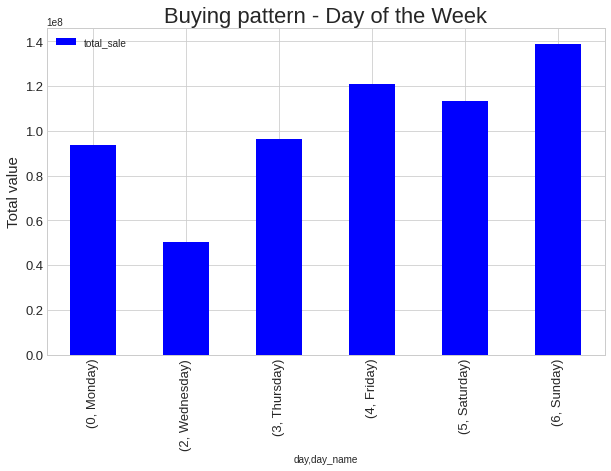

In [150]:
# Customer buying patterns -- day of the week v.2

sales_db['day'] = sales_db['invoice_date'].dt.dayofweek
sales_db['day_name'] = sales_db['invoice_date'].dt.day_name()

dfg = sales_db[['day', 'total_sale', 'day_name']].groupby(['day', 'day_name']).sum()

ax = dfg.plot(kind='bar', figsize=(10,6), color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Buying pattern - Day of the Week", fontsize=22)
ax.set_ylabel("Total value", fontsize=15);
plt.show()

# Can't I also do this with strftime? 
# Not creating new columns but using groupby with on-the-fly date extracts?
#sales_db[['total_sale']].groupby((sales_db['invoice_date'].dt.strftime('%w')), (sales_db['invoice_date'].dt.strftime('%A'))).sum().sort_index.plot()


In [144]:
dfg = dfg.reset_index()

dfg=sales_db.groupby(["product_type"])["total_sale"].sum().reset_index()
dfg=dfg.sort_values(by = "total_sale", ascending=False)


/tmp/ipykernel_4508/3952164288.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfg = dfg.append({'day': 1, 'day_name': 'Tuesday', 'value': 0},ignore_index=True)


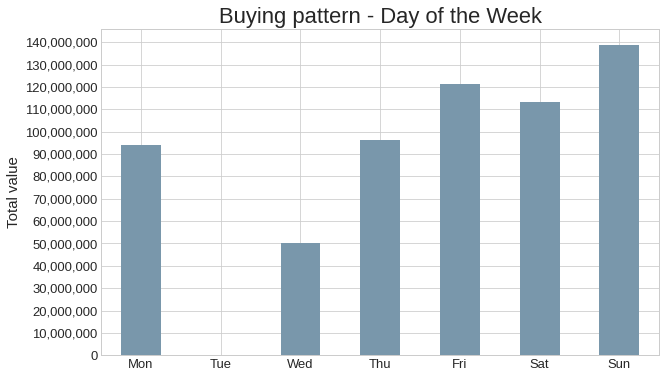

In [151]:
# Customer buying patterns -- day of the week v.3
dfg = dfg.reset_index()
dfg = dfg.append({'day': 1, 'day_name': 'Tuesday', 'value': 0},ignore_index=True)
dfg = dfg[['day', 'total_sale', 'day_name']].groupby(['day', 'day_name']).sum()

x_ticks_labels = ['Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']

# Set number of ticks for x-axis
#ax.set_xticks(x)
# Set ticks labels for x-axis

ax = dfg.plot(kind='bar', figsize=(10,6), color="#7997ab", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Buying pattern - Day of the Week", fontsize=22)

ax.set_ylabel("Total value", fontsize=15);
ax.yaxis.get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(tik.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_xlabel("")
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=13)

ax.get_legend().set_visible(False)
plt.yticks(np.arange(0, max(dfg['total_sale'])+10000000, step=10_000_000))


plt.savefig('graphs/buying_pattern_day_of_week.jpg', bbox_inches='tight');
plt.show()
# n.b.: append is on the way out => use concat instead

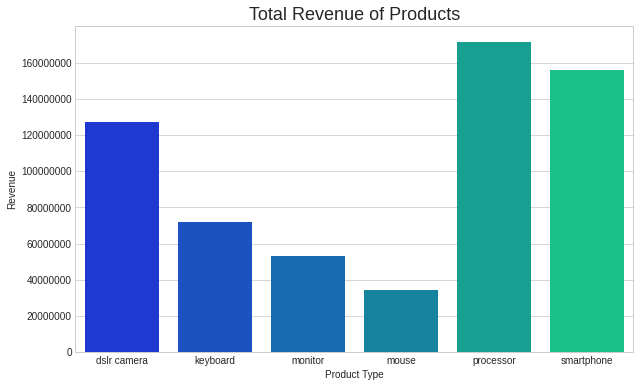

In [155]:
df_product= sales_db.groupby(["product_type"])["total_sale"].sum().reset_index()
df_product.sort_values(by = "total_sale", ascending=False)

plt.figure(figsize=(10,6))
sb.barplot(x="product_type", y= "total_sale", data= df_product, palette = "winter")
plt.xlabel ("Product Type")
plt.ylabel("Revenue")
#plt.ylim(0, 1600000)
ax.get_yaxis().set_major_formatter(tik.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(np.arange(0, 175000000, step=20_000_000))

plt.title("Total Revenue of Products", size=18)
plt.savefig("graphs/total_revenue_products.jpg", bbox_inches='tight')

Text(0.5, 1.0, 'Total revenue over days')

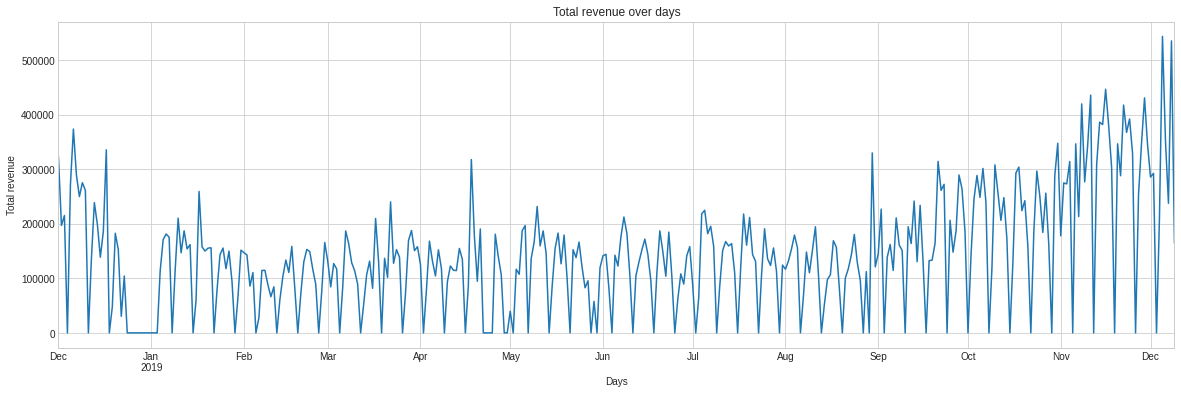

In [140]:
# This will give a graph of total sales over all 365 days of the year

sales_db.resample('D', on='invoice_date').price.sum().plot(kind='line', figsize=(20,6))
plt.ylabel('Total revenue')
plt.xlabel('Days')
plt.title('Total revenue over days')

In [77]:
sales_db['week'] = sales_db['invoice_date'].dt.strftime('%V')
sales_db = sales_db.astype({
    'week':'int'
})

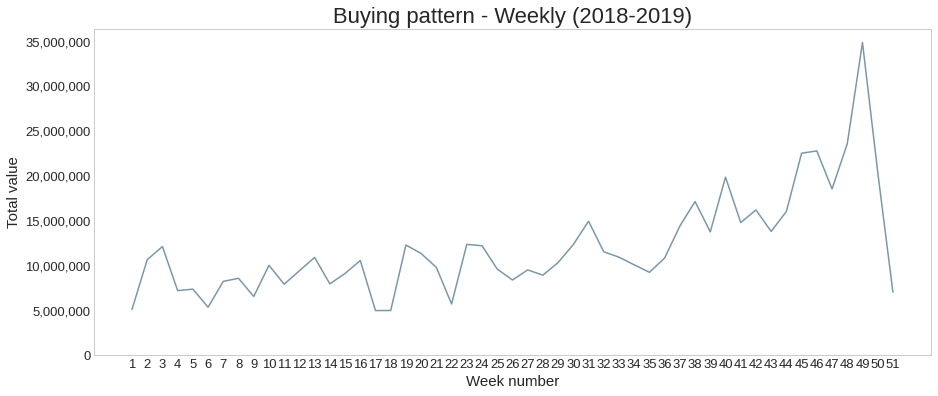

In [111]:
# This solution will not have all weeks labelled
#dfg = sales_db.groupby(sales_db['invoice_date'].dt.strftime('%W'))['total_sale'].sum()

dfg = sales_db.groupby(sales_db['week'])['total_sale'].sum()

ax = dfg.plot(kind='line', figsize=(15,6), color="#7997ab", fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Buying pattern - Weekly (2018-2019)', fontsize=22)
ax.grid(False)

ax.set_ylabel("Total value", fontsize=15)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(tik.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_xlabel('Week number', fontsize=15)

plt.yticks(np.arange(0, max(dfg)+5000000, step=5_000_000))
plt.xticks(np.arange(1,52,1))

plt.savefig('graphs/buying_pattern_week_numbers.jpg', bbox_inches='tight');
plt.show()


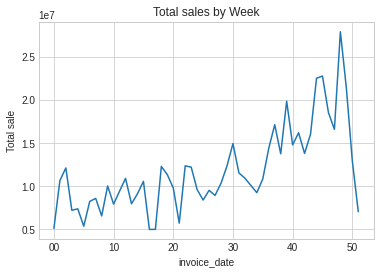

In [15]:
sales_db.groupby(sales_db['invoice_date'].dt.strftime('%W'))['total_sale'].sum().plot()
plt.title('Total sales by Week')
plt.ylabel('Total sale');

In [ ]:
# Graph that shows all months together
# I.e. total sales on the 1st of the month, 2nd of the month, ...
# irrespective of which month it is.
# Since it is e-commerce Sundays are irrelevant. The only thing you
# would have to factor in are full and hollow months.



In [124]:
sales_db['month'] = sales_db['invoice_date'].dt.strftime('%m')
sales_db = sales_db.astype({
    'month':'int'
})

In [132]:
sales_db['day_date'] = sales_db['invoice_date'].dt.strftime('%d')
sales_db = sales_db.astype({
    'day_date':'int'
})

In [ ]:
# yaxis: total_sale.sum() -- price.count()
# xaxis: days of the month (1-31) -/day_date/- [pd.Grouper(key='invoice_date', freq='M')
# lines: months -/month/- product_type
# df.groupby(xaxis, line).yaxis

# sales_db.groupby(
#     [pd.Grouper(key='invoice_date', freq='D'), sales_db['invoice_date'].dt.strftime('%m')]
#     ).total_sale.sum().unstack().plot(legend=True, figsize=(13,7))

# sales_db.groupby(
    
#     ).total_sale.sum().unstack().plot(legend=True, figsize=(13,7))



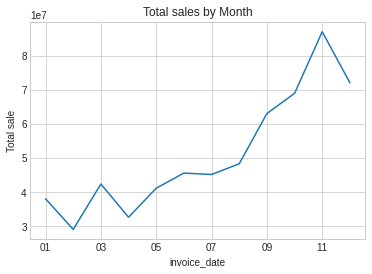

In [20]:
sales_db.groupby(sales_db['invoice_date'].dt.strftime('%m'))['total_sale'].sum().plot()
plt.title('Total sales by Month')
plt.ylabel('Total sale');

Text(0.5, 1.0, 'Total revenue over months')

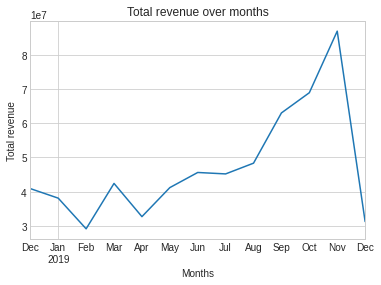

In [21]:
sales_db.resample('M', on='invoice_date').total_sale.sum().plot(kind='line')
plt.ylabel('Total revenue')
plt.xlabel('Months')
plt.title('Total revenue over months')

Text(0.5, 1.0, 'Total revenue over quarters')

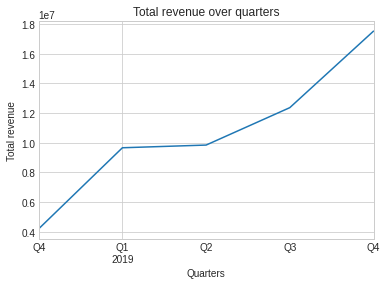

In [14]:
sales_db.resample('Q', on='invoice_date').price.sum().plot(kind='line')
plt.ylabel('Total revenue')
plt.xlabel('Quarters')
plt.title('Total revenue over quarters')

<hr>